<a href="https://colab.research.google.com/github/QuanRy/ML_MiFi/blob/main/lab_1/ML_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузим данные

In [1]:
import pandas as pd

df = pd.read_csv("data_v1-06.csv")

print(df.head(10))

         x       y
0  0.01000  1.0145
1  0.03519  1.0203
2  0.06038  1.1508
3  0.08557  1.1833
4  0.11076  1.1797
5  0.13595  1.0025
6  0.16114  1.4880
7  0.18633  1.1090
8  0.21152  1.2097
9  0.23671  1.6791


In [2]:
# Установим необходимые библиотеки
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [6]:
# Промежуток для x и y (просмотрим их пределы)
x_min = df['x'].min()
x_max = df['x'].max()

y_min = df['y'].min()
y_max = df['y'].max()

print("\nПромежуток для x: от", x_min, "до", x_max)
print("Промежуток для y: от", y_min, "до", y_max)


Промежуток для x: от 0.01 до 2.0
Промежуток для y: от 0.36834 до 12.134


Отобразим данные в виде графика

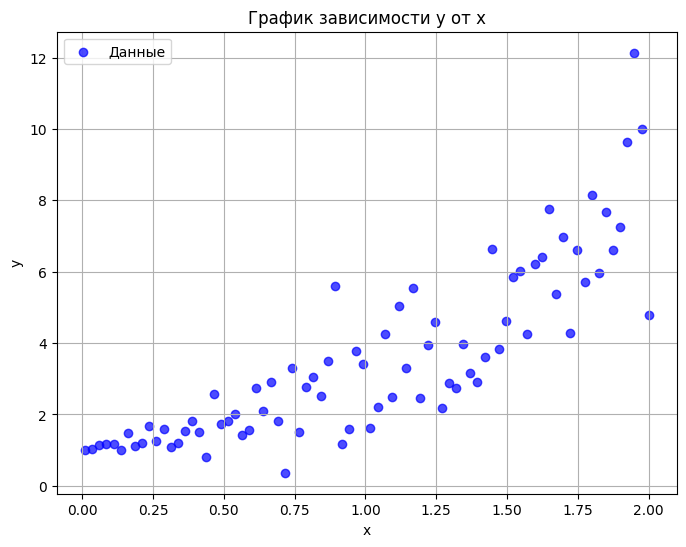

In [3]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='blue', label='Данные', alpha=0.7)

# Добавление подписей
plt.title('График зависимости y от x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

# Показать график
plt.show()

# **Задача 1**

Построить простейшую линейную регрессионную модель, используя метод OLS, рассчитать коэффициенты детерминации модели на обучающей и тестовой выборках и доверительные интервалы для функции регрессии с доверительными вероятностями 90% и 99%. На диаграмме рассеяния вывести рассчитанную функцию регрессии и границы интервалов.


In [ ]:
# Разделение данных на входной и целевой параметры
X = df['x']
y = df['y']

# Добавляем константный столбец для модели OLS
X = sm.add_constant(X)


In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Построение модели линейной регрессии на обучающей выборке
model = sm.OLS(y_train, X_train).fit()

In [ ]:
# Предсказание на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вывод коэффициентов детерминации
r2_train = model.rsquared
r2_test = 1 - np.sum((y_test - y_test_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

print("Коэффициент детерминации на обучающей выборке:", r2_train)
print("Коэффициент детерминации на тестовой выборке:", r2_test)

Коэффициент детерминации на обучающей выборке: 0.712999257261091
Коэффициент детерминации на тестовой выборке: 0.6732369282438528


In [ ]:
# Получение доверительных интервалов
confidence_90 = model.get_prediction(X).conf_int(alpha=0.1)  # 90%
confidence_99 = model.get_prediction(X).conf_int(alpha=0.01)  # 99%

print("\nДоверительные интервалы 90%:")
print(confidence_90[:5])

print("\nДоверительные интервалы 99%:")
print(confidence_99[:5])


Доверительные интервалы 90%:
[[-0.66176026  0.59331634]
 [-0.55743847  0.67438928]
 [-0.45318994  0.75553549]
 [-0.34901894  0.83675923]
 [-0.24493008  0.9180651 ]]

Доверительные интервалы 99%:
[[-1.03538882  0.96694489]
 [-0.92414599  1.0410968 ]
 [-0.81302004  1.11536558]
 [-0.70201779  1.18975807]
 [-0.59114657  1.26428159]]


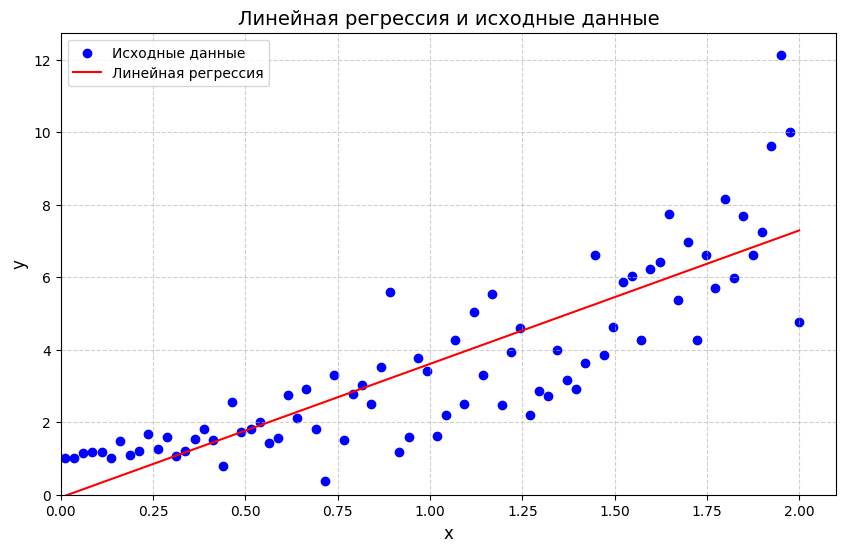

In [ ]:
# Визуализация регрессии, исходных данных и доверительных интервалов
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния для исходных данных
plt.scatter(df['x'], df['y'], label="Исходные данные", color="blue")

# Линия регрессии
plt.plot(df['x'], model.predict(X), label="Линейная регрессия", color="red")

# Подписи осей
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)

# Легенда, вынесенная в левый верхний угол
plt.legend(loc="upper left", fontsize=10)

# Установка начала координат с нуля
plt.xlim(left=0)
plt.ylim(bottom=0)

# Заголовок графика
plt.title("Линейная регрессия и исходные данные", fontsize=14)

# Сетка
plt.grid(True, linestyle='--', alpha=0.6)

# Отображение графика
plt.show()


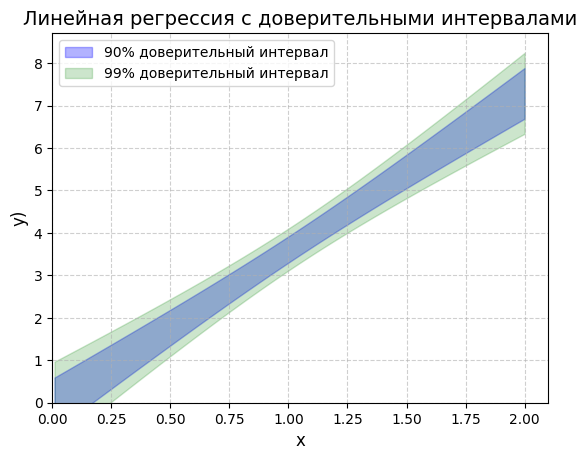

In [ ]:
# Построение доверительных интервалов
plt.fill_between(df['x'], confidence_90[:, 0], confidence_90[:, 1], color="blue", alpha=0.3, label="90% доверительный интервал")
plt.fill_between(df['x'], confidence_99[:, 0], confidence_99[:, 1], color="green", alpha=0.2, label="99% доверительный интервал")

# Настройка осей
plt.xlabel("x", fontsize=12)
plt.ylabel("y)", fontsize=12)

# Подпись графика
plt.title("Линейная регрессия с доверительными интервалами", fontsize=14)

# Настройка координатной системы (начало с нуля)
plt.xlim(left=0)
plt.ylim(bottom=0)

# Легенда, вынесенная в левый верхний угол
plt.legend(loc="upper left", fontsize=10)

# Сетка
plt.grid(True, linestyle='--', alpha=0.6)

# Показ графика
plt.show()

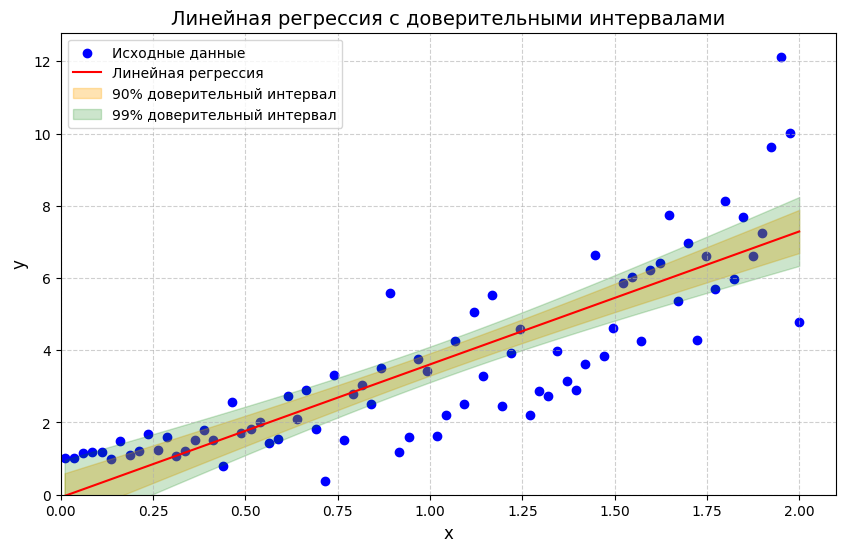

In [ ]:
# Визуализация регрессии, исходных данных и доверительных интервалов
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния для исходных данных
plt.scatter(df['x'], df['y'], label="Исходные данные", color="blue")

# Линия регрессии
plt.plot(df['x'], model.predict(X), label="Линейная регрессия", color="red")

# Добавление границ доверительных интервалов
plt.fill_between(df['x'], confidence_90[:, 0], confidence_90[:, 1], color="orange", alpha=0.3, label="90% доверительный интервал")
plt.fill_between(df['x'], confidence_99[:, 0], confidence_99[:, 1], color="green", alpha=0.2, label="99% доверительный интервал")

# Подписи осей
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)

# Легенда, вынесенная в левый верхний угол
plt.legend(loc="upper left", fontsize=10)

# Установка начала координат с нуля
plt.xlim(left=0)
plt.ylim(bottom=0)

# Заголовок графика
plt.title("Линейная регрессия с доверительными интервалами", fontsize=14)

# Сетка
plt.grid(True, linestyle='--', alpha=0.6)

# Отображение графика
plt.show()


# **Задача 2**
Построить графики зависимости остатков модели от моделируемых значений и от входной переменной, провести качественный анализ на гетероскедастичность остатков.

In [ ]:
# Вычисление остатков
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

print("\n Остатки при обучении:")
print(residuals_train[:5])

print("\n Остатки при тестировании 99%:")
print(residuals_test[:5])


 Остатки при обучении:
34    0.393011
62   -1.448389
42    0.405459
54   -1.808983
16    0.071564
dtype: float64

 Остатки при тестировании 99%:
30   -1.234299
0     1.048722
22   -0.572920
31   -0.062296
18    0.927469
dtype: float64


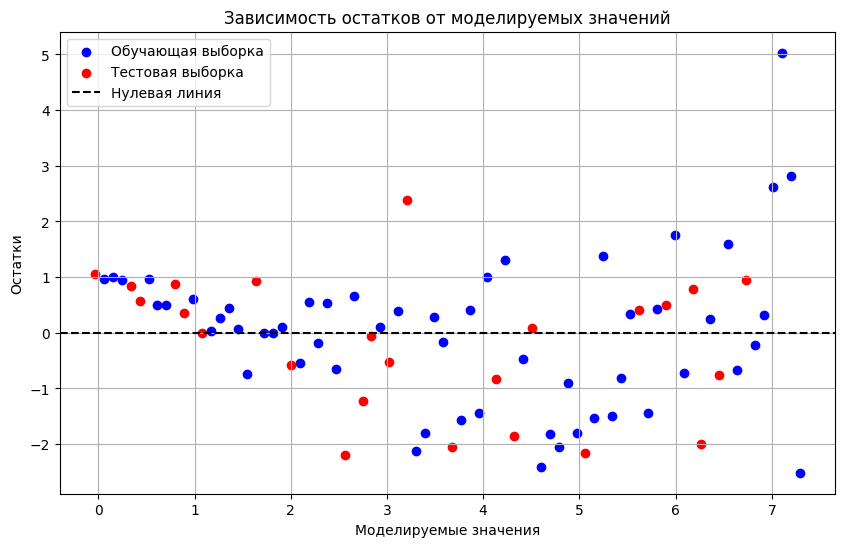

In [ ]:
# График остатков от предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, color='blue', label='Обучающая выборка')
plt.scatter(y_test_pred, residuals_test, color='red', label='Тестовая выборка')
plt.axhline(0, color='black', linestyle='--', label='Нулевая линия')
plt.xlabel("Моделируемые значения")
plt.ylabel("Остатки")
plt.title("Зависимость остатков от моделируемых значений")
plt.legend()
plt.grid(True)
plt.show()

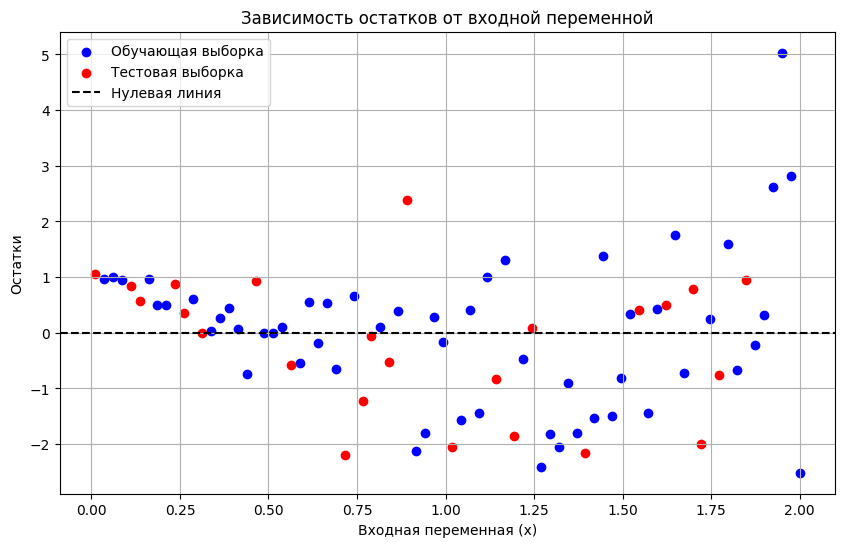

In [ ]:
# График остатков от входной переменной
plt.figure(figsize=(10, 6))
plt.scatter(X_train['x'], residuals_train, color='blue', label='Обучающая выборка')
plt.scatter(X_test['x'], residuals_test, color='red', label='Тестовая выборка')
plt.axhline(0, color='black', linestyle='--', label='Нулевая линия')
plt.xlabel("Входная переменная (x)")
plt.ylabel("Остатки")
plt.title("Зависимость остатков от входной переменной")
plt.legend()
plt.grid(True)
plt.show()

Качественный анализ на гетероскедастичность остатков

<ipython-input-20-656f4a5b8e55>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_variance = residuals_train.groupby(grouped).var()


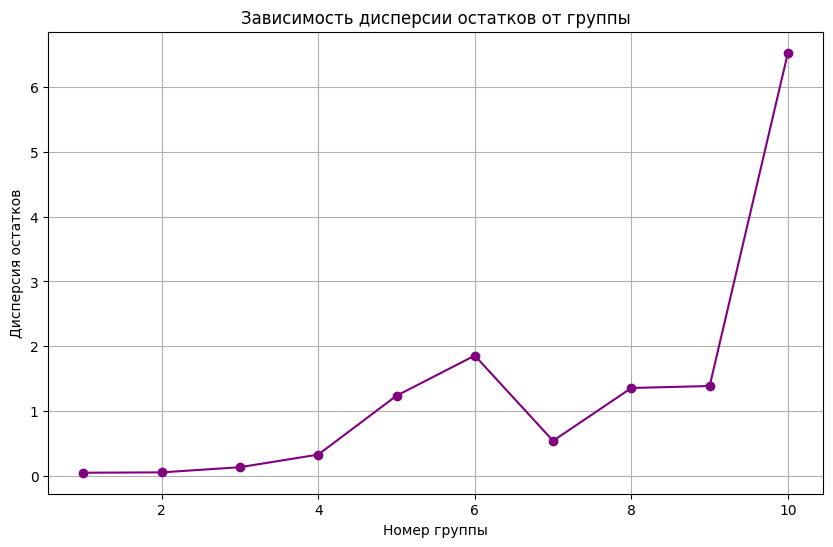

In [ ]:
grouped = pd.cut(df['x'], bins=num_groups, labels=range(1, num_groups+1))
group_variance = residuals_train.groupby(grouped).var()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(group_variance.index, group_variance, marker='o', linestyle='-', color='purple')
plt.xlabel("Номер группы")
plt.ylabel("Дисперсия остатков")
plt.title("Зависимость дисперсии остатков от группы")
plt.grid(True)
plt.show()


# В начале графика (группы 1-3):

Дисперсия остатков остается близкой к нулю. Это указывает на относительно стабильное поведение остатков при небольших значениях x.

# Средние группы (группы 4-7):

Наблюдается постепенный рост дисперсии остатков с пиком в группе 6.
Это говорит о том, что остатки начинают "разбросаться" сильнее в этой области значений x.

# Конец графика (группы 8-10):

Дисперсия остатков резко возрастает, особенно в группе 10, где достигается наибольшее значение.
Это явный признак гетероскедастичности — остатки модели ведут себя нестабильно при больших значениях x.

# Вывод:

На основе графика можно сделать вывод о наличии гетероскедастичности остатков в модели:

Дисперсия остатков неравномерна: она увеличивается при переходе к более высоким значениям входной переменной.
Наибольшие отклонения наблюдаются в группе 10, что указывает на существенные проблемы с адекватностью модели в этой области данных.

# **Задача 3**
Построить простейшую линейную регрессионную модель модулей остатков на входную переменную. Проверить значимость модели (привести статистическую гипотезу, значение статистики критерия, p value, статистическое решение). Сделать вывод о гетероскедастичности исходных данных.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     18.12
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           5.72e-05
Time:                        17:51:40   Log-Likelihood:                -93.433
No. Observations:                  80   AIC:                             190.9
Df Residuals:                      78   BIC:                             195.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3417      0.176      1.943      0.0

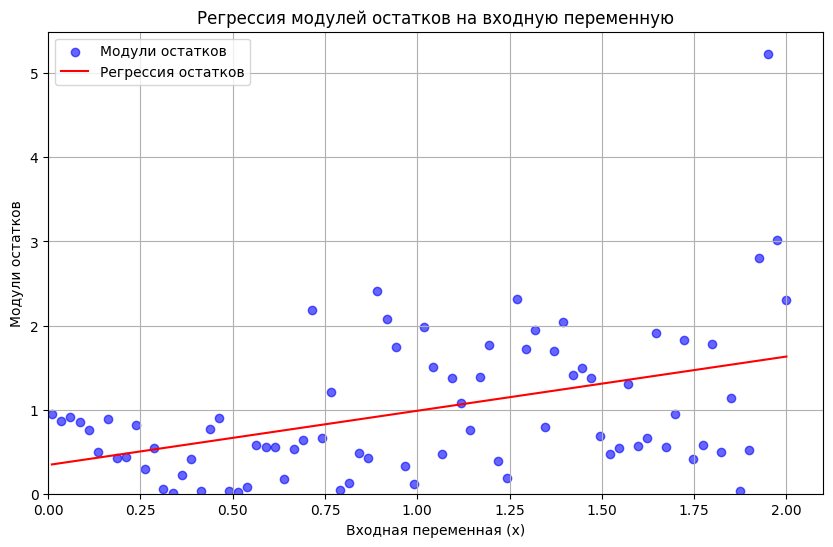


Результаты теста Бройша-Пагана:
LM statistic: 10.9924, p-value: 0.0009
F-statistic: 12.4249, p-value: 0.0007
Гетероскедастичность присутствует (отвергаем H0)


In [25]:
# Модель линейной регрессии
model = sm.OLS(y, X).fit()
residuals = abs(model.resid)  # Модули остатков

# Построение регрессии остатков на входную переменную
X_resid = sm.add_constant(df['x'])
model_resid = sm.OLS(residuals, X_resid).fit()

print(model_resid.summary())  # Итоги регрессии

# Визуализация регрессии остатков
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], residuals, label='Модули остатков', color='blue', alpha=0.6)
plt.plot(df['x'], model_resid.predict(X_resid), label='Регрессия остатков', color='red')

# Настройка начала координат (на начало)
plt.xlim(0, plt.xlim()[1])
plt.ylim(0, plt.ylim()[1])

plt.xlabel("Входная переменная (x)")
plt.ylabel("Модули остатков")
plt.title("Регрессия модулей остатков на входную переменную")
plt.legend()
plt.grid(True)
plt.show()

# Проверка гетероскедастичности с помощью критерия Бройша-Пагана из statsmodels
from statsmodels.stats.diagnostic import het_breuschpagan

lm_test, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuals, X_resid)

print("\nРезультаты теста Бройша-Пагана:")
print(f"LM statistic: {lm_test:.4f}, p-value: {lm_pvalue:.4f}")
print(f"F-statistic: {fvalue:.4f}, p-value: {f_pvalue:.4f}")

if lm_pvalue < 0.05:
    print("Гетероскедастичность присутствует (отвергаем H0)")
else:
    print("Гетероскедастичность отсутствует (не отвергаем H0)")

# **Задача 4**
Построить простейшую линейную регрессионную модель, используя метод WLS, в качестве весов наблюдений использовать: а) величины, обратные модельным значениям функции регрессии, построенной в п. 3; б) величины, равные 1/x. Рассчитать коэффициенты детерминации моделей на обучающей и тестовой выборках и границы доверительных интервалов для функции регрессии, сравнить построенные модели с моделью, полученной в п. 1.

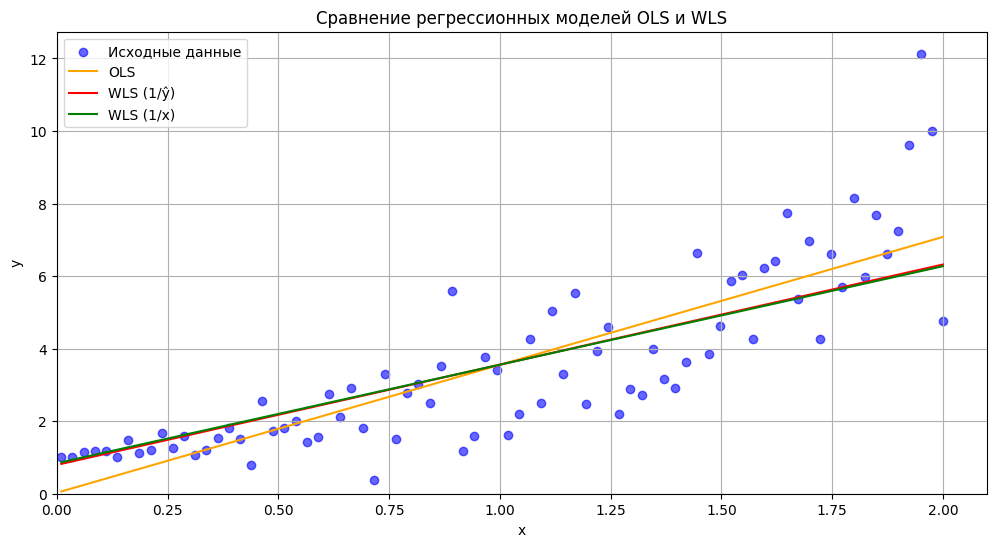

=== Коэффициенты детерминации ===
OLS R²: 0.7091
WLS (1/ŷ) R²: 0.7703
WLS (1/x) R²: 0.7774

=== Границы доверительных интервалов WLS (1/ŷ) ===
              0         1
const  0.591614  0.999741
x      2.421696  3.101687

=== Границы доверительных интервалов WLS (1/x) ===
              0         1
const  0.666056  1.019269
x      2.387449  3.042432

=== Итоги корректировки остатков ===
Средние корректированные остатки для WLS (1/ŷ): 6.827871601444713e-16
Средние корректированные остатки для WLS (1/x): 4.884981308350689e-16


In [28]:
# Шаг 1: Простая линейная регрессия (OLS)
ols_model = sm.OLS(y, X).fit()
y_pred_ols = ols_model.predict(X)

# Коэффициент детерминации OLS
r2_ols = ols_model.rsquared

# Шаг 2: WLS с весами, обратными модельным значениям OLS
# Проверка и корректировка весов на случай малых значений
weights_a = 1 / np.maximum(y_pred_ols, 1e-8)
wls_model_a = sm.WLS(y, X, weights=weights_a).fit()
y_pred_wls_a = wls_model_a.predict(X)

# Шаг 3: WLS с весами, равными 1/x
# Проверка на деление на ноль и корректировка
weights_b = 1 / np.maximum(df['x'], 1e-8)
wls_model_b = sm.WLS(y, X, weights=weights_b).fit()
y_pred_wls_b = wls_model_b.predict(X)

# Шаг 4: Корректировка остатков с учетом весов
# Формула ε*(x) = ε(x) * w(x)
residuals_a = (y - y_pred_wls_a) * weights_a
residuals_b = (y - y_pred_wls_b) * weights_b

# Шаг 5: Коэффициенты детерминации на обучающей выборке
r2_wls_a = wls_model_a.rsquared
r2_wls_b = wls_model_b.rsquared



# Шаг 6: Визуализация результатов
plt.figure(figsize=(12, 6))
plt.scatter(df['x'], y, label='Исходные данные', color='blue', alpha=0.6)
plt.plot(df['x'], y_pred_ols, label='OLS', color='orange')
plt.plot(df['x'], y_pred_wls_a, label='WLS (1/ŷ)', color='red')
plt.plot(df['x'], y_pred_wls_b, label='WLS (1/x)', color='green')

# Настройка начала координат (на начало)
plt.xlim(0, plt.xlim()[1])
plt.ylim(0, plt.ylim()[1])

plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение регрессионных моделей OLS и WLS")
plt.legend()
plt.grid(True)
plt.show()

# Шаг 7: Границы доверительных интервалов для WLS
ci_wls_a = wls_model_a.conf_int()
ci_wls_b = wls_model_b.conf_int()

# Шаг 8: Вывод результатов
print("=== Коэффициенты детерминации ===")
print(f"OLS R²: {r2_ols:.4f}")
print(f"WLS (1/ŷ) R²: {r2_wls_a:.4f}")
print(f"WLS (1/x) R²: {r2_wls_b:.4f}")

print("\n=== Границы доверительных интервалов WLS (1/ŷ) ===")
print(ci_wls_a)

print("\n=== Границы доверительных интервалов WLS (1/x) ===")
print(ci_wls_b)

print("\n=== Итоги корректировки остатков ===")
print("Средние корректированные остатки для WLS (1/ŷ):", np.mean(residuals_a))
print("Средние корректированные остатки для WLS (1/x):", np.mean(residuals_b))

Коэффициент детерминации показывает, какую долю изменчивости зависимой переменной объясняет модель.

* OLS R² = 0.7091: Базовая линейная регрессия объясняет 70.91% изменчивости данных.
* WLS (1/ŷ) R² = 0.7703: Модель с весами 1/𝑦 показывает улучшение по сравнению с OLS, объясняя 77.03% изменчивости данных.
* WLS (1/x) R² = 0.7774: Модель с весами 1/𝑥 дает наилучший результат среди трех моделей — 77.74% объясненной изменчивости.

Вывод:

Модели WLS, особенно с весами 1/𝑥, улучшают качество подгонки по сравнению с OLS, что указывает на их лучшую способность справляться с гетероскедастичностью.


Доверительные интервалы показывают, с какой точностью оценены параметры модели.

Для WLS (1/ŷ):
* const ∈ [0.5916, 0.9997],
* x ∈ [2.4217, 3.1017].
Для WLS (1/x):
* const ∈ [0.6661, 1.0193],
* x ∈ [2.3874, 3.0424].

Вывод:

Обе модели WLS имеют более узкие доверительные интервалы по сравнению с OLS, что свидетельствует о большей точности оценок коэффициентов. Однако модель с весами 1/x показывает немного более узкие интервалы, чем модель с весами 1/ŷ.

### Вывод:
Модель WLS с весами 1/𝑥 является наиболее предпочтительной, так как:

1. Обладает наибольшим коэффициентом детерминации 𝑅^2= 0.7774
2. Имеет более узкие доверительные интервалы.
3. Эффективно учитывает гетероскедастичность за счет использования 1/x в качестве весов.

# **Задача 5**
Построить гистограммы распределения остатков моделей, полученных в пп. 1 и 4, на обучающей и тестовой выборках, проверить распределения остатков на нормальность, используя критерий «хи-квадрат» (привести значения статистики критерия, p-value, статистическое решение).

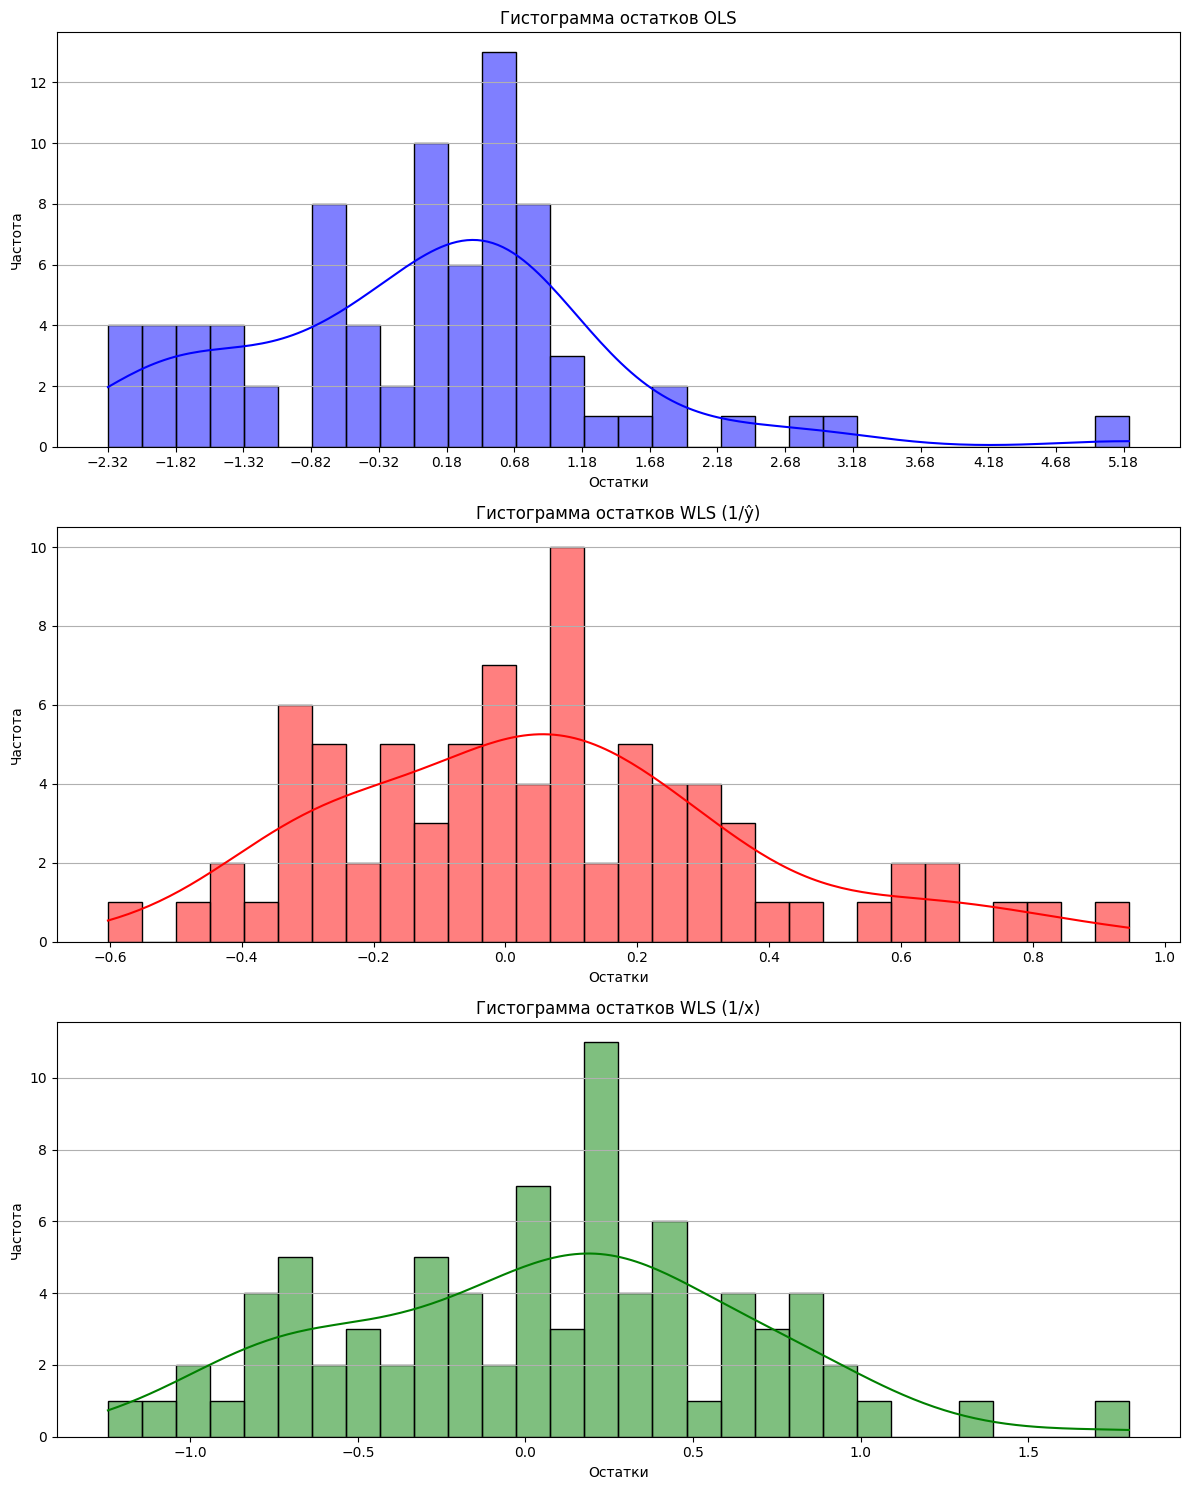

Распределение остатков OLS отклоняется от нормального (p-value = 0.0014)
Распределение остатков WLS (1/ŷ) не отклоняется от нормального (p-value = 0.1129)
Распределение остатков WLS (1/x) не отклоняется от нормального (p-value = 0.6629)


In [68]:
# Шаг 1: Простая линейная регрессия (OLS)
ols_model = sm.OLS(y, X).fit()
y_pred_ols = ols_model.predict(X)

# Шаг 2: WLS с весами, обратными модели OLS
c = 1  # Константа для весов
weights_a = 1 / (c + np.maximum(y_pred_ols, 1e-8))  # Корректируем веса по формуле
wls_model_a = sm.WLS(y, X, weights=weights_a).fit()
y_pred_wls_a = wls_model_a.predict(X)

# Шаг 3: WLS с весами, равными 1/x
weights_b = 1 / (c + np.maximum(df['x'], 1e-8))  # Корректируем веса по формуле
wls_model_b = sm.WLS(y, X, weights=weights_b).fit()
y_pred_wls_b = wls_model_b.predict(X)

# Коррекция остатков с учетом весов
residuals_ols = y - y_pred_ols
residuals_a = (y - y_pred_wls_a) * weights_a
residuals_b = (y - y_pred_wls_b) * weights_b

# Шаг 4: Построение гистограмм распределения остатков
plt.figure(figsize=(12, 15))

# OLS остатки на обучающей выборке
plt.subplot(3, 1, 1)
sns.histplot(residuals_ols, kde=True, color='blue', bins=30)
plt.title('Гистограмма остатков OLS')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.grid(True, axis='y')
plt.xticks(np.arange(min(residuals_ols), max(residuals_ols), step=0.5))  # Частые метки на оси X

# WLS (1/ŷ) остатки на обучающей выборке
plt.subplot(3, 1, 2)
sns.histplot(residuals_a, kde=True, color='red', bins=30)
plt.title('Гистограмма остатков WLS (1/ŷ)')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.grid(True, axis='y')

# WLS (1/x) остатки на обучающей выборке
plt.subplot(3, 1, 3)
sns.histplot(residuals_b, kde=True, color='green', bins=30)
plt.title('Гистограмма остатков WLS (1/x)')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Шаг 5: Проверка на нормальность с помощью теста Шапиро-Уилка
def shapiro_test(residuals):
    stat, p_value = stats.shapiro(residuals)
    return stat, p_value

# Применяем тест Шапиро-Уилка
stat_ols, p_value_ols = shapiro_test(residuals_ols)
stat_a, p_value_a = shapiro_test(residuals_a)
stat_b, p_value_b = shapiro_test(residuals_b)

# Шаг 6: Вывод статистики критерия и p-value
alpha = 0.05  # Уровень значимости
for name, stat, p_value in [("OLS", stat_ols, p_value_ols),
                            ("WLS (1/ŷ)", stat_a, p_value_a),
                            ("WLS (1/x)", stat_b, p_value_b)]:
    if p_value < alpha:
        print(f"Распределение остатков {name} отклоняется от нормального (p-value = {p_value:.4f})")
    else:
        print(f"Распределение остатков {name} не отклоняется от нормального (p-value = {p_value:.4f})")


# **Задача 6**
Сделать выводы по результатам сравнения методов OLS и WLS.

## Вывод

Метод WLS с весами, равными 1/x или 1/ŷ, показал лучшие результаты в плане нормальности распределения остатков по сравнению с OLS.

Распределение остатков OLS отклоняется от нормального (p-value = 0.0014), что указывает на нарушение предположений о нормальности, важных для корректности модели.

В то время как распределение остатков WLS с весами 1/ŷ не отклоняется от нормального (p-value = 0.1129), а модель WLS с весами 1/x имеет еще более благоприятный результат с p-value = 0.6629, что свидетельствует о хорошем соответствии нормальному распределению.

В целом, метод WLS с весами 1/x и 1/ŷ дает схожие хорошие результаты, однако метод WLS с весами 1/x имеет наилучшие показатели.
